<a href="https://colab.research.google.com/github/misohwa/daegu-ai-school-web/blob/main/04_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EC%84%9D_%EC%83%98%ED%94%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.8.0'

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os, shutil

In [12]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './drive/MyDrive/datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './drive/MyDrive/datasets/cats_and_dogs_small'
## if os.path.exists(base_dir):
##     print('testing...')
##     shutil.rmtree(base_dir)
## os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
## os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
## os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
## os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
## os.mkdir(train_cats_dir)
# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
## os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
## os.mkdir(validation_cats_dir)
# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
## os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
## os.mkdir(test_cats_dir)
# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
## os.mkdir(test_dogs_dir)

# 처음 1000개의 고양이 이미지를 train_cats_dir에 복사합니다.
print('Copy files...')
print('---traing file (cat)...')
fnames = ['cat.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
##   shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지를 validation_cats_dir에 복사합니다.
print('---validation file(s) (cat).... ')
fnames = ['cat.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
##   shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지를 test_cats_dir에 복사합니다.
print('---test file(s) (cat).... ')
fnames = ['cat.{}.jpg'.format(i) for i in range (1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
##   shutil.copyfile(src, dst)

# 처음 1000개의 강아지 이미지를 train_dogs_dir에 복사합니다.
print('---traing file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range (1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
##   shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사합니다.
print('---validation file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range (1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
##   shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지를 test_dogs_dir에 복사합니다.
print('---test file(s) (dog).... ')
fnames = ['dog.{}.jpg'.format(i) for i in range (1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
##   shutil.copyfile(src, dst)


Copy files...
---traing file (cat)...
---validation file(s) (cat).... 
---test file(s) (cat).... 
---traing file(s) (dog).... 
---validation file(s) (dog).... 
---test file(s) (dog).... 


In [13]:
# 파일 copy가 잘 되었는지 확인하는 코드
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
훈련용 강아지 이미지 전체 개수: 1000
검증용 강아지 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [14]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())   #이미지를 일자로 펴는 작업
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  
#맨 끝에 출력은 한개만 있으면 됨, 이진분류를 하기 위해서 sigmoid 사용

In [15]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
              # 둘 중 하나 선택하는 거면 로스가 정해져 있다

# model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)    #이미지 사이즈 통일시키기
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
model.fit_generator(
    train_generator,
    epochs=30,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 659s 7s/step - loss: 0.6881 - acc: 0.5385 - val_loss: 0.6934 - val_acc: 0.5220
Epoch 2/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6591 - acc: 0.6060 - val_loss: 0.6394 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 12s 124ms/step - loss: 0.6132 - acc: 0.6580 - val_loss: 0.6573 - val_acc: 0.6080
Epoch 4/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5641 - acc: 0.7110 - val_loss: 0.5878 - val_acc: 0.6820
Epoch 5/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5294 - acc: 0.7270 - val_loss: 0.6229 - val_acc: 0.6640
Epoch 6/30
100/100 [==============================] - 12s 123ms/step - loss: 0.5055 - acc: 0.7555 - val_loss: 0.5768 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 12s 123ms/step - loss: 0.4717 - acc: 0.7800 - val_loss: 0.6992 - val_acc: 0.6510
Epoch 8/30
100/100 [==============================] - 12s

In [18]:
#지금까지 학습한 상태를 파일로 저장(.h5는 keras 저장 확장자)
model.save('cats_and_dogs_small_1.h5')


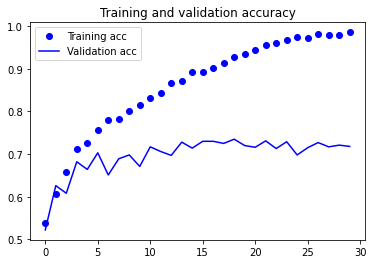

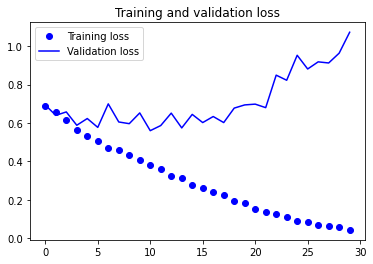

In [19]:
history = model.history

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

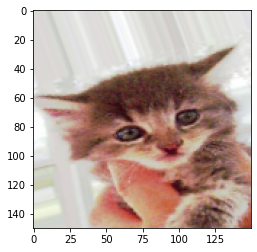

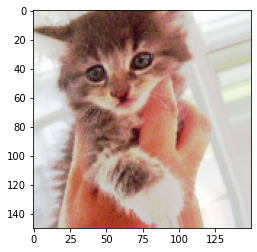

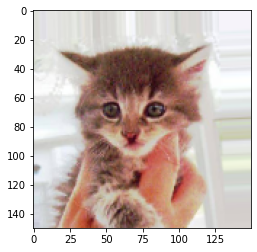

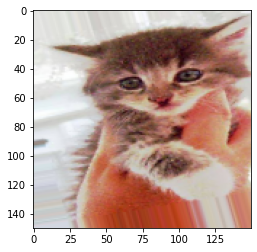

In [20]:
# 이미지 sample을 증가시키는 방법(앵글조절, 위치이동 등)
# 학습용 데이터는 샘플을 증가시켜도 되지만, test는 실제 데이터로 사용 요망
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
100/100 [==============================] - 21s 210ms/step - loss: 0.6740 - acc: 0.5710 - val_loss: 0.6504 - val_acc: 0.6140
Epoch 2/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6625 - acc: 0.6025
Epoch 3/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6467 - acc: 0.6290
Epoch 4/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6387 - acc: 0.6310
Epoch 5/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6224 - acc: 0.6535
Epoch 6/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6052 - acc: 0.6720
Epoch 7/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6014 - acc: 0.6770
Epoch 8/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6057 - acc: 0.6660
Epoch 9/100
100/100 [==============================] - 17s 172ms/step - loss: 0.5974 - acc: 0.6770
Epoch 10/100
100/100 [==============================] - 17s 173ms/step -

In [26]:
model.save('cats_and_dogs_small_2.h5')

ValueError: ignored

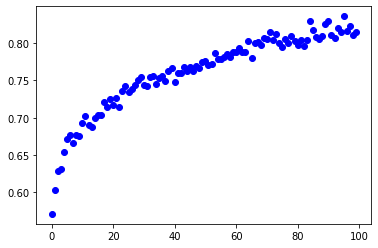

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()